# TASK 3 - CLASSIFICATION 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

Read the .csv file containing the data. The first line contains the list of attributes. The data is assigned to a Pandas dataframe.

In [2]:
df = pd.read_csv(r"csv/seismic_new.csv", skipinitialspace=True)

In [3]:
df.head(110)

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,class,log_genergy,log_gpuls,log_gdenergy,log_gdpuls,log_energy
0,0.0,0.0,0,15180,48,-72,-72,0.0,0,0,0,0,0,0,0,9.627734,3.871201,3.218876,3.218876,0.000000
1,0.0,0.0,0,14720,33,-70,-79,0.0,1,0,1,0,0,2000,0,9.596962,3.496508,3.295837,2.890372,7.601402
2,0.0,0.0,0,8050,30,-81,-78,0.0,0,0,0,0,0,0,0,8.993427,3.401197,2.772589,2.944439,0.000000
3,0.0,0.0,0,28820,171,-23,40,0.0,1,0,1,0,0,3000,0,10.268825,5.141664,4.304065,4.919981,8.006701
4,0.0,0.0,0,12640,57,-63,-52,0.0,0,0,0,0,0,0,0,9.444622,4.043051,3.526361,3.806662,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.0,0.0,1,166700,363,-34,-56,0.0,0,0,0,0,0,0,0,12.023951,5.894403,4.143135,3.713572,0.000000
106,0.0,0.0,1,274170,997,15,34,0.0,0,0,0,0,0,0,0,12.521504,6.904751,4.718499,4.875197,0.000000
107,0.0,1.0,0,56120,222,100,89,0.0,1,0,1,0,0,5000,0,10.935248,5.402677,5.283204,5.225747,8.517393
108,0.0,1.0,1,226790,717,2,0,0.0,0,0,0,0,0,0,0,12.331780,6.575076,4.595120,4.574711,0.000000


In [4]:
df.shape

(2578, 20)

In [5]:
sns.set_theme(style="darkgrid")

### Feature preprocessing

Removing unnecessary attributes

In [6]:
to_drop = ['log_genergy', 'log_gpuls', 'log_gdenergy', 'log_gdpuls', 'log_energy', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'seismic', 'seismoacoustic', 'hazard']
df.drop(to_drop, axis=1, inplace=True)

In [7]:
df.head()

,shift,genergy,gpuls,gdenergy,gdpuls,nbumps,energy,class
0,0,15180,48,-72,-72,0,0,0
1,0,14720,33,-70,-79,1,2000,0
2,0,8050,30,-81,-78,0,0,0
3,0,28820,171,-23,40,1,3000,0
4,0,12640,57,-63,-52,0,0,0


In [8]:
# Importing Libraries

# Hold-out
from sklearn.model_selection import train_test_split

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Optional: KNN
from sklearn.neighbors import KNeighborsClassifier

# Optional: RandomForest
from sklearn.ensemble import RandomForestClassifier

# Decision Tree Visualization 
from sklearn import tree # export_graphviz() method
import pydotplus # viz stuff
from IPython.display import Image # viz stuff

# Evaluation 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay, plot_precision_recall_curve
# Optional: baseline comparison
from sklearn.dummy import DummyClassifier

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# cross-validation
from sklearn.model_selection import cross_val_score

### X = attributes, Y =  target value

Training Test Split

In [9]:
# Attribute selection

attributes = [col for col in df.columns if col != 'class']

X = df[attributes].values

y = df['class']

In [10]:
# hold-out

# Test set 30% of the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

len(df), X_train.shape[0], X_test.shape[0]

# test_size-> specify the proportion of the split eg 0.3, 30% of the dataset belongs to the test set
# stratify -> to mantain the balance of the target variable
# random_state -> to specify that we want a good splitting, avoiding the randomness of the splitting

# X_train-> feature space of the training set
# X_test ->feature space of the test set
# y_train -> target variables of the training set
# y_test ->target variables of the test set

(2578, 1804, 774)

In [11]:
y_test.value_counts()

0    723
1     51
Name: class, dtype: int64

In [12]:
y_train.value_counts()

0    1685
1     119
Name: class, dtype: int64

In [15]:
df_test = pd.DataFrame(X_test)
df_test.rename(columns={0:"shift", "1":"genergy", "2":"gpuls", "3":"gdenergy", "4":"gdpuls", "5":"nbumps", "6":"energy"})
df_test.columns = ["shift","genergy","gpuls","gdenergy","gdpuls","nbumps","energy"]
df_test['class']=y_test.values
df_test

,shift,genergy,gpuls,gdenergy,gdpuls,nbumps,energy,class
0,1,134640,611,-41,-16,0,0,0
1,1,40140,417,19,35,6,11300,0
2,1,11320,472,-6,56,0,0,0
3,1,22140,190,-2,-53,1,2000,0
4,1,8260,343,-39,2,0,0,0
...,...,...,...,...,...,...,...,...
769,1,1189240,2159,-3,-12,3,5200,0
770,0,3650,41,-44,-46,1,4000,0
771,1,47670,507,40,-11,0,0,0
772,1,347400,1684,-28,-22,2,31000,0


In [16]:
df_test.to_csv("csv/test_set.csv", index=False)

### Oversampling

https://imbalanced-learn.org/stable/over_sampling.html#random-over-sampler

In [13]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from collections import Counter
from collections import defaultdict

#### RandomOverSampler

In [14]:
# One way is to generate new samples in the classes which are under-represented (in our case class = 1).
# The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples.

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1685, 1: 1685})


Viene generato un nuovo training set con elementi con classe 0 e con classe 1 di ugual numero (1685)

### DecisionTreeClassifier

In [15]:
# Instantiating Decision Tree Classifier

clf = DecisionTreeClassifier()
clf.fit(X_res, y_res)

DecisionTreeClassifier()

### Hyperparameters Tuning

In [16]:
# RandomizedSearchCV

param_list = {"criterion": ['gini', 'entropy'], 
              'max_depth': [None] + [2, 3, 4, 6, 8, 10, 12], # cut of the leaf
              'min_samples_split': [2, 3, 4, 5, 8, 10, 12, 15, 18, 20, 25], # min n. of samples required in a node to split the node
              'min_samples_leaf': [1, 2, 3, 4, 5, 10, 12, 15, 20, 22, 25] # min n. of samples required to be in both left and right 
                                                                         # child of a parent node to split that parent node
             }

grid_search = RandomizedSearchCV(clf, param_distributions=param_list, scoring='recall', n_iter=100, random_state=42)
grid_search.fit(X_res, y_res)

res = grid_search.cv_results_

In [18]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3,
                       min_samples_split=5)

In [19]:
# Reports for Top 3 hyperparameter settings

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [20]:
report(res, n_top=3)

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': None, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.994 (std: 0.006)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 3, 'max_depth': None, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.987 (std: 0.018)
Parameters: {'min_samples_split': 18, 'min_samples_leaf': 1, 'max_depth': 12, 'criterion': 'entropy'}



In [21]:
# DecisionTreeClassifier with best hyperparameters

clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=None ,
                             min_samples_split=5,
                             min_samples_leaf=3,
                            )

# Fitting the model
clf.fit(X_res, y_res)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3,
                       min_samples_split=5)

In [22]:
# Dictionary with most important features
# Feature importances are provided by the fitted attribute feature_importances_ 
# and they are computed as the mean and standard deviation of 
#accumulation of the impurity decrease within each tree.

imp_dict = {attr: clf.feature_importances_[i] for i, attr in enumerate(attributes)}
imp_dict

{'shift': 0.008741030761013699,
 'genergy': 0.24852648020071022,
 'gpuls': 0.13645537159046467,
 'gdenergy': 0.1650825542341966,
 'gdpuls': 0.18653461053718767,
 'nbumps': 0.04045504168950314,
 'energy': 0.2142049109869239}

In [23]:
# Ordered Dictionary
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}

{'genergy': 0.24852648020071022,
 'energy': 0.2142049109869239,
 'gdpuls': 0.18653461053718767,
 'gdenergy': 0.1650825542341966,
 'gpuls': 0.13645537159046467,
 'nbumps': 0.04045504168950314,
 'shift': 0.008741030761013699}

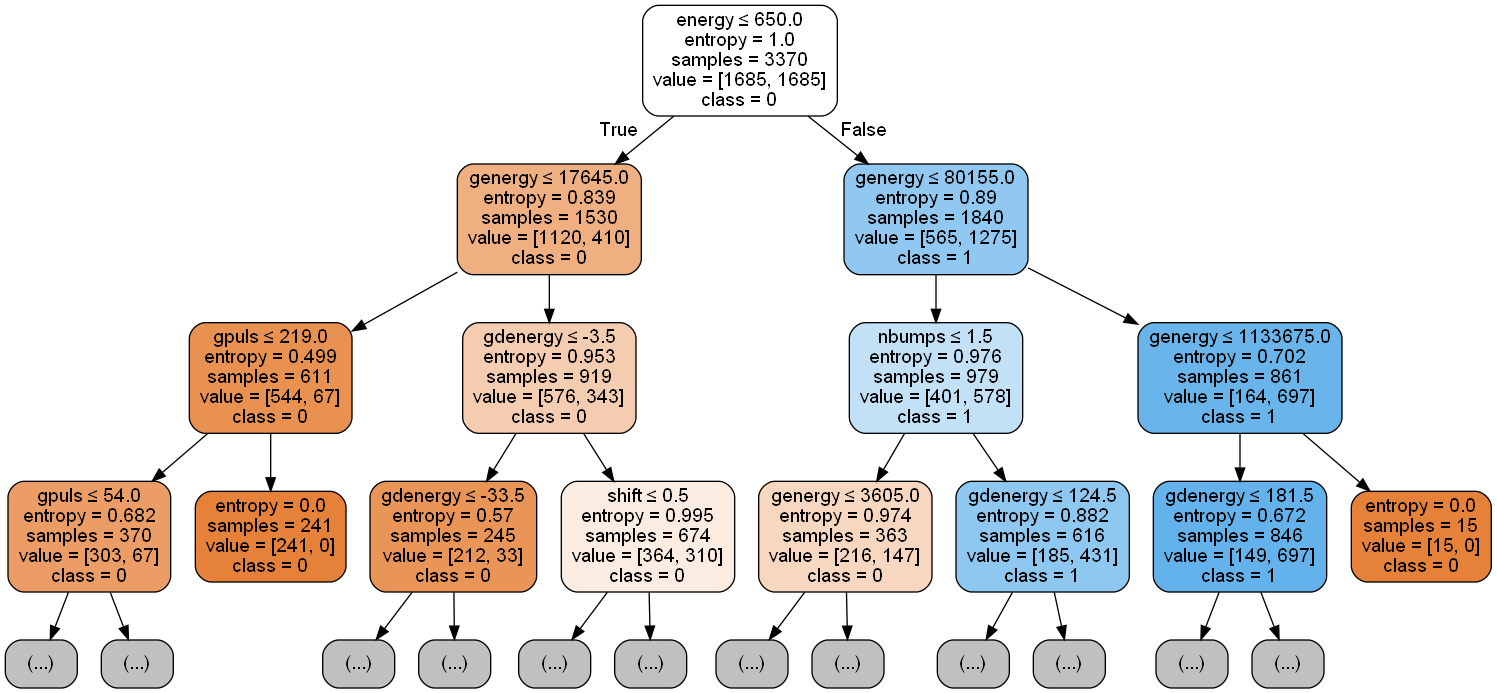

In [24]:
# Decision Tree Visualization | max depth = 3

dot_data = tree.export_graphviz (clf, # Name of the instances of the DT
                                out_file=None,
                                feature_names=attributes, # Name of the variables
                                class_names=[str(v) for v in clf.classes_], # Name of the classes in target variable
                                filled=True, rounded=True,
                                special_characters=True,
                                max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# in the first line we have the attribute use to split the node and the treshold used
# in the second row we have the impurity measure 
# in the third row we have the number of insatances in the node
# in the fourth we have the division of the instances according to the target attribute 
# in the fifth line we have the most frequent class in the node

Evaluation of the DT (graph above): <br>
On the first node we can observe:
* 1 parameter: variable that we chose to split the node, in the first node it's based on a categorical attribute. eg Sex <= 0.5-> if sex == 0 (female), you split the rows in the left child, if sex == 1 (male), you split the rows on the right child.
* 2 parameter: impurity measurement, eg 0.473-> node is impure,  high value
* 3 parameter: number of Samples within the node
* 4 parameter: Number of samples according to the target variable, eg so 384 is the number of values associated to the first value of the target variable, 239 is the number of samples associated to the second value of the target variable. We'll rename the first value (384) as a negative class and the other (239) as a positive class, since a common way to deal with the target variable's value in a binary classification is to have a negative class (associated to the label 0) and a positive class (associated to the label 1). NB. Useful for the evaluation.
* 5 parameter: Indicates the most frequent class within the node

### Overfitting/Underfitting Curve

In [72]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 26)]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_res, y_res)
    # evaluate on the train dataset
    train_yhat = model.predict(X_res)
    train_acc = accuracy_score(y_res, train_yhat)
    train_err = 1 - train_acc
    train_scores.append(train_err)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_err = 1 - test_acc
    test_scores.append(test_err)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.711, test: 0.690
>2, train: 0.721, test: 0.651
>3, train: 0.765, test: 0.795
>4, train: 0.804, test: 0.767
>5, train: 0.814, test: 0.814
>6, train: 0.854, test: 0.798
>7, train: 0.877, test: 0.846
>8, train: 0.912, test: 0.851
>9, train: 0.927, test: 0.867
>10, train: 0.948, test: 0.881
>11, train: 0.965, test: 0.884
>12, train: 0.975, test: 0.898
>13, train: 0.985, test: 0.902
>14, train: 0.992, test: 0.901
>15, train: 0.993, test: 0.899
>16, train: 0.995, test: 0.907
>17, train: 0.995, test: 0.906
>18, train: 0.996, test: 0.898
>19, train: 0.999, test: 0.910
>20, train: 0.999, test: 0.906
>21, train: 1.000, test: 0.913
>22, train: 1.000, test: 0.906
>23, train: 1.000, test: 0.904
>24, train: 1.000, test: 0.911
>25, train: 1.000, test: 0.910


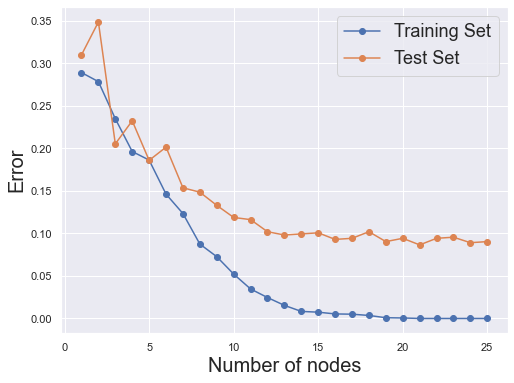

In [80]:
# Plot of train and test scores vs tree depth
plt.figure(figsize=(8,6))
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('Error', fontsize=20)
plt.plot(values, train_scores, '-o', label='Training Set')
plt.plot(values, test_scores, '-o', label='Test Set')
plt.legend(prop={'size': 18})
plt.show()

### Evaluation

In [27]:
# Predict the target variable according to the rules found above (on training set)
y_pred = clf.predict(X_res)

In [28]:
# List of classes predicted by algorithm
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [29]:
# Original values of the class
y_train.values[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [30]:
# Evaluation of the prediction: comparing the prediction with the original values
print('Accuracy', accuracy_score(y_res, y_pred))
print('F1', f1_score(y_res, y_pred, average=None)) # Average-> obtain values both for neg (sx) and pos (dx) class

Accuracy 0.9928783382789318
F1 [0.99282726 0.9929287 ]


In [31]:
# Summary of prediction
print( classification_report(y_res, y_pred) )

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1685
           1       0.99      1.00      0.99      1685

    accuracy                           0.99      3370
   macro avg       0.99      0.99      0.99      3370
weighted avg       0.99      0.99      0.99      3370



In [32]:
# Confusion Matrix
cf = confusion_matrix(y_res, y_pred, labels=[1,0])
cf

array([[1685,    0],
       [  24, 1661]], dtype=int64)

In [33]:
# TP, FN, FP, TN
cf[0][0], cf[0][1], cf[1][0], cf[1][1]

(1685, 0, 24, 1661)

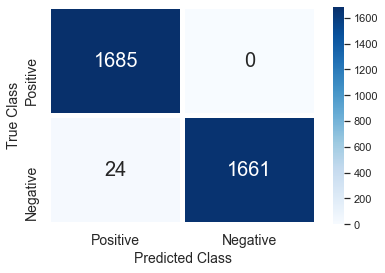

In [34]:
# Displaying heatmap of confusion matrix
ax = sns.heatmap(cf, annot=True, fmt="d", annot_kws={"size": 20}, linewidths=4, cmap="Blues")
ax.set_xticklabels(['Positive','Negative'], fontsize=14)
ax.set_xlabel('Predicted Class', fontsize=14)
ax.set_yticklabels(['Positive','Negative'], fontsize=14)
ax.set_ylabel('True Class', fontsize=14)

plt.show()

In [35]:
# Normalized confusion matirx
cf = confusion_matrix(y_res, y_pred, labels=[1,0], normalize='all')
cf

array([[0.5       , 0.        ],
       [0.00712166, 0.49287834]])

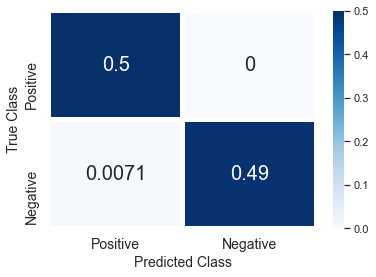

In [36]:
# Displaying heatmap of normalized confusion matrix
ax = sns.heatmap(cf, annot=True, annot_kws={"size": 20}, linewidths=4, cmap="Blues")
ax.set_xticklabels(['Positive','Negative'], fontsize=14)
ax.set_xlabel('Predicted Class', fontsize=14)
ax.set_yticklabels(['Positive','Negative'], fontsize=14)
ax.set_ylabel('True Class', fontsize=14)

plt.show()

#### Check su test set | ROC Curve

In [37]:
# Predict the target variable according to the rules (on test set)
y_pred = clf.predict(X_test)

In [38]:
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [39]:
# Evaluation of the prediction: comparing the prediction with the original values
print('Accuracy', accuracy_score(y_test, y_pred))
print('F1', f1_score(y_test, y_pred, average=None)) # Average-> obtain values both for neg (sx) and pos (dx) class

Accuracy 0.8914728682170543
F1 [0.94198895 0.16      ]


In [40]:
# Summary of prediction
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       723
           1       0.16      0.16      0.16        51

    accuracy                           0.89       774
   macro avg       0.55      0.55      0.55       774
weighted avg       0.89      0.89      0.89       774



In [41]:
# Another way to predict: obtain probability instead of classes (useful to introduce the ROC curve)
# Prediction of the positive class
# Prediction the probability of a sample belong to the positive class
y_score = clf.predict_proba(X_test)
y_score[:10]

# Any prediction (rows) is a pair of values, where on the left we have the 
# probability to belong the negative class (eg 1) and on the right the prob to belong
# to the positive class (eg 0)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [42]:
# ROC curve
fpr, tpr, th = roc_curve(y_test, y_score[:,1])

# Area under the curve
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.549141648360589


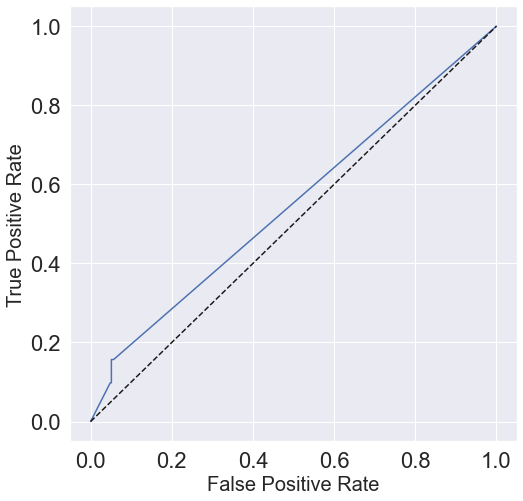

In [43]:
# Visualization of the ROC curve
plt.figure(figsize=(8,8))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

#### Precision-Recall curve

Utilizziamo la Precision-Recall curve poiché il nostro dataset è fortemente sbilanciato nella target variable

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [44]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [45]:
# Area under the curve

prc_auc = auc(recall, precision)
prc_auc

0.16050930708200592

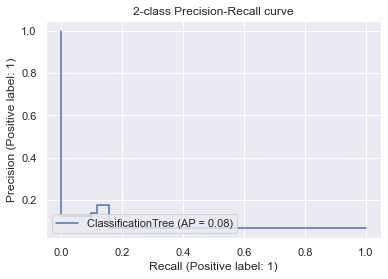

In [46]:
# Visualization of the Precision-Recall curve

y_score = clf.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="ClassificationTree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

## KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# KNN with k from 1 up to 10

k = 15

for i in range(1, k+1):
    clf_KNN = KNeighborsClassifier(n_neighbors=i)
    print("KNN with k =", + i)
    scores = cross_val_score(clf_KNN, X, y, cv=10)
    print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    scores = cross_val_score(clf_KNN, X, y, cv=10, scoring='f1_macro')
    print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    print("===================================")

KNN with k = 1
Accuracy: 0.8747 (+/- 0.10)
F1-score: 0.5292 (+/- 0.05)
KNN with k = 2
Accuracy: 0.9275 (+/- 0.02)
F1-score: 0.5086 (+/- 0.07)
KNN with k = 3
Accuracy: 0.9046 (+/- 0.10)
F1-score: 0.5039 (+/- 0.06)
KNN with k = 4
Accuracy: 0.9255 (+/- 0.03)
F1-score: 0.5001 (+/- 0.06)
KNN with k = 5
Accuracy: 0.9193 (+/- 0.05)
F1-score: 0.5016 (+/- 0.08)
KNN with k = 6
Accuracy: 0.9298 (+/- 0.01)
F1-score: 0.4863 (+/- 0.03)
KNN with k = 7
Accuracy: 0.9255 (+/- 0.02)
F1-score: 0.4959 (+/- 0.04)
KNN with k = 8
Accuracy: 0.9325 (+/- 0.01)
F1-score: 0.4964 (+/- 0.06)
KNN with k = 9
Accuracy: 0.9298 (+/- 0.01)
F1-score: 0.4982 (+/- 0.06)
KNN with k = 10
Accuracy: 0.9321 (+/- 0.01)
F1-score: 0.4960 (+/- 0.06)
KNN with k = 11
Accuracy: 0.9306 (+/- 0.01)
F1-score: 0.5019 (+/- 0.08)
KNN with k = 12
Accuracy: 0.9329 (+/- 0.01)
F1-score: 0.4927 (+/- 0.04)
KNN with k = 13
Accuracy: 0.9321 (+/- 0.01)
F1-score: 0.4957 (+/- 0.05)
KNN with k = 14
Accuracy: 0.9329 (+/- 0.01)
F1-score: 0.4872 (+/- 0.03)
K

## RandomForest

In [83]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [None] + [2, 3, 4, 6, 8, 10, 12]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 8, 10, 12, 15, 18, 20, 25]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5, 10, 12, 15, 20, 22, 25]

# Method of selecting samples for training each tree
bootstrap = [False, False]

In [84]:
# Create the param grid
param_grid = {'n_estimators': n_estimators, 
               'max_features': max_features, 
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [None, 2, 3, 4, 6, 8, 10, 12], 'min_samples_split': [2, 3, 4, 5, 8, 10, 12, 15, 18, 20, 25], 'min_samples_leaf': [1, 2, 3, 4, 5, 10, 12, 15, 20, 22, 25], 'bootstrap': [False, False]}


In [88]:
rf_Model = RandomForestClassifier()

#### GridSearch

In [89]:
#rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 2)

In [90]:
#rf_Grid.fit(X_res, y_res)

In [91]:
# Best parameters for RandomForest generated by GridSearch

#rf_Grid.best_params_

#### RandomizedSearchCV

In [92]:
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 2)

In [93]:
rf_RandomGrid.fit(X_res, y_res)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=2,
                   param_distributions={'bootstrap': [False, False],
                                        'max_depth': [None, 2, 3, 4, 6, 8, 10,
                                                      12],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 10,
                                                             12, 15, 20, 22,
                                                             25],
                                        'min_samples_split': [2, 3, 4, 5, 8, 10,
                                                              12, 15, 18, 20,
                                                              25],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [94]:
# Best parameters for RandomForest generated by RandomizedSearch

rf_RandomGrid.best_params_

{'n_estimators': 48,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 12,
 'bootstrap': False}

#### Check Accuracy

In [95]:
#print (f'Train Accuracy - : {rf_Grid.score(X_res,y_res):.3f}')
#print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

In [96]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_res,y_res):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.993
Test Accuracy - : 0.922


In [97]:
y_pred_rf = rf_RandomGrid.predict(X_test)

In [98]:
y_pred_rf[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [99]:
y_score_rf = rf_RandomGrid.predict_proba(X_test)
y_score_rf[:10]

array([[0.97128605, 0.02871395],
       [0.62399475, 0.37600525],
       [0.97685904, 0.02314096],
       [0.81843921, 0.18156079],
       [0.95920706, 0.04079294],
       [0.98375061, 0.01624939],
       [0.93134244, 0.06865756],
       [0.64389046, 0.35610954],
       [0.9616105 , 0.0383895 ],
       [0.95119464, 0.04880536]])

In [100]:
fpr, tpr, th = roc_curve(y_test, y_score_rf[:,1])

roc_auc_rf = auc(fpr, tpr)
print(roc_auc_rf)

0.7234968676267188


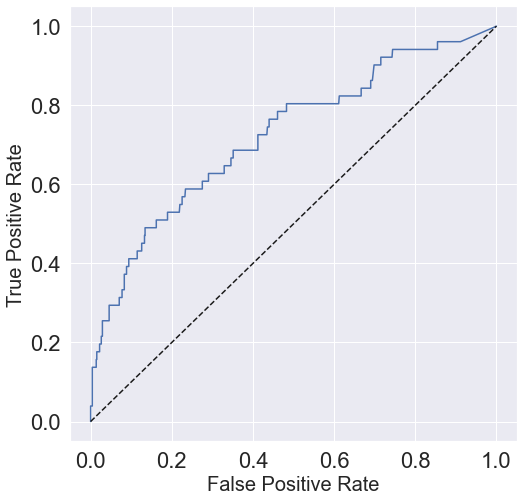

In [101]:
plt.figure(figsize=(8,8))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [102]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score_rf[:,1])

In [103]:
prc_auc_rf = auc(recall, precision)
prc_auc_rf

0.25189811199480266

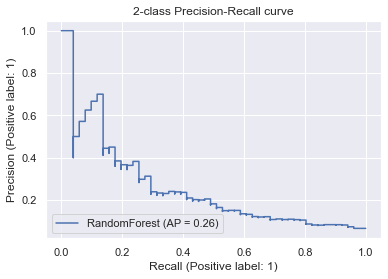

In [104]:
y_score_rf = rf_RandomGrid.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score_rf[:,1], name="RandomForest")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [111]:
best = []
best = rf_RandomGrid.best_params_
best

{'n_estimators': 48,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 12,
 'bootstrap': False}

In [112]:
rf_Model = RandomForestClassifier(bootstrap= False, 
                                  max_depth= 12, 
                                  max_features= 'sqrt', 
                                  min_samples_leaf= 2, 
                                  min_samples_split= 10, 
                                  n_estimators= 48)
rf_Model

RandomForestClassifier(bootstrap=False, max_depth=12, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=48)

In [113]:
rf_Model.fit(X_res, y_res)

RandomForestClassifier(bootstrap=False, max_depth=12, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=48)

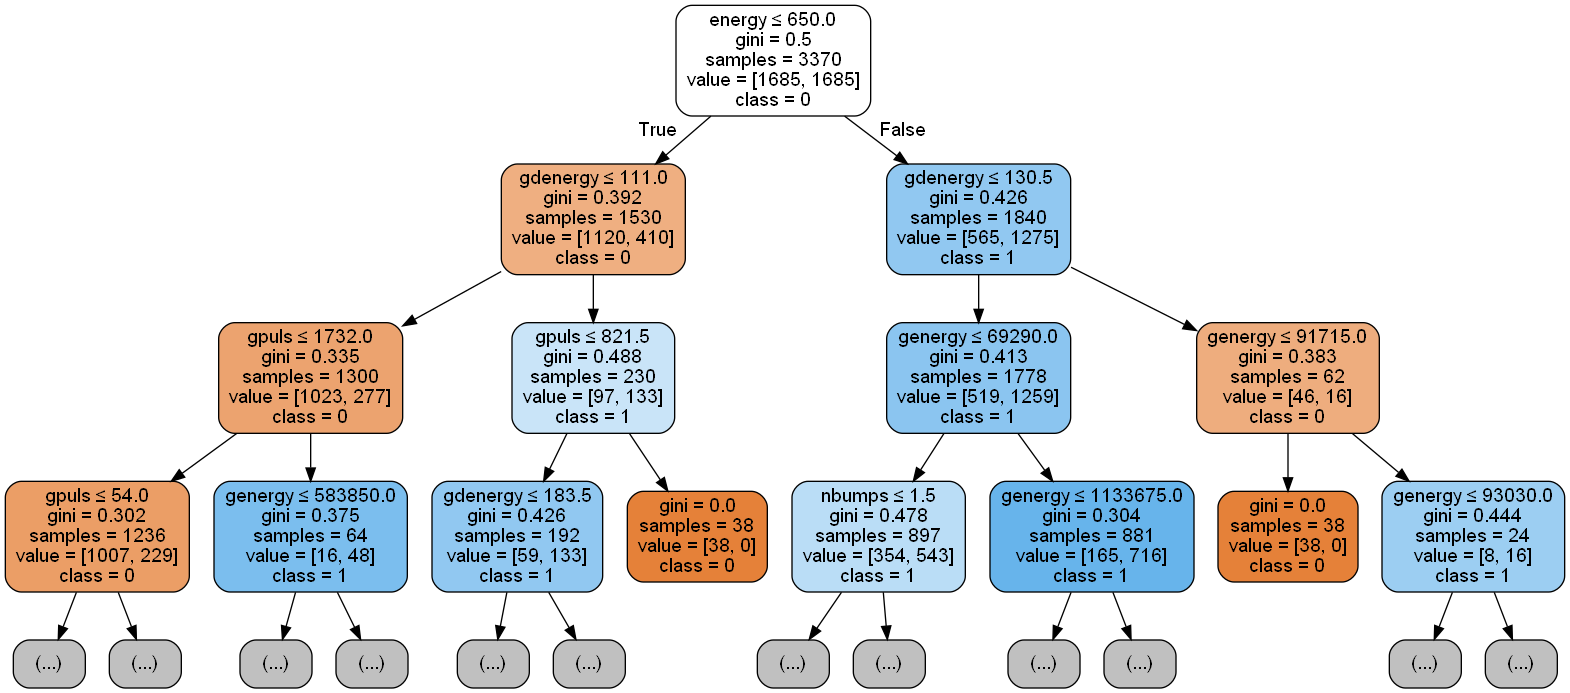

In [114]:
dot_data = tree.export_graphviz (rf_Model.estimators_[0], out_file=None,
                                feature_names=attributes,
                                class_names=[str(v) for v in rf_Model.classes_],
                                filled=True, rounded=True,
                                special_characters=True,
                                max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [115]:
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 26)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = RandomForestClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_res, y_res)
    # evaluate on the train dataset
    train_yhat = model.predict(X_res)
    train_acc = accuracy_score(y_res, train_yhat)
    train_err = 1 - train_acc
    train_scores.append(train_err)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_err = 1 - test_acc
    test_scores.append(test_err)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.717, test: 0.758
>2, train: 0.726, test: 0.749
>3, train: 0.755, test: 0.796
>4, train: 0.800, test: 0.807
>5, train: 0.838, test: 0.828
>6, train: 0.861, test: 0.846
>7, train: 0.898, test: 0.860
>8, train: 0.936, test: 0.876
>9, train: 0.965, test: 0.893
>10, train: 0.977, test: 0.907
>11, train: 0.985, test: 0.913
>12, train: 0.993, test: 0.924
>13, train: 0.997, test: 0.920
>14, train: 0.999, test: 0.925
>15, train: 0.999, test: 0.929
>16, train: 1.000, test: 0.933
>17, train: 1.000, test: 0.928
>18, train: 1.000, test: 0.935
>19, train: 1.000, test: 0.930
>20, train: 1.000, test: 0.932
>21, train: 1.000, test: 0.930
>22, train: 1.000, test: 0.932
>23, train: 1.000, test: 0.932
>24, train: 1.000, test: 0.932
>25, train: 1.000, test: 0.935


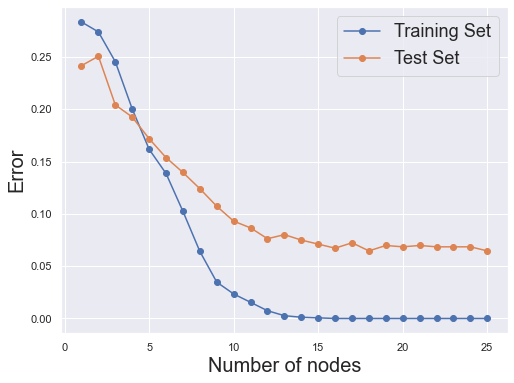

In [116]:
# plot of train and test scores vs tree depth
plt.figure(figsize=(8,6))
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('Error', fontsize=20)
plt.plot(values, train_scores, '-o', label='Training Set')
plt.plot(values, test_scores, '-o', label='Test Set')
plt.legend(prop={'size': 18})
plt.show()